# DSCI 503 - Homework 08
### Bernard Mwamburi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Problem 1: Diamonds Dataset

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep = '\t')
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.loc[:, 'carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds.loc[:, 'price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [3]:
X1_num = diamonds.loc[:, 'ln_carat'].values.reshape(-1, 1)
X1_cat = diamonds.loc[:, ['cut', 'color', 'clarity']].values
y1 = diamonds.loc[:, 'ln_price'].values

print(f'''
Numerical Feature Array Shape:   {X1_num.shape}
Categorical Feature Arrat Shape: {X1_cat.shape}
Label Array Shape:               {y1.shape}
''')


Numerical Feature Array Shape:   (53940, 1)
Categorical Feature Arrat Shape: (53940, 3)
Label Array Shape:               (53940,)



In [4]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X1_cat)
X1_enc = encoder.transform(X1_cat)

print(f'Encoded Feature Array Shape: {X1_enc.shape}')

Encoded Feature Array Shape: (53940, 20)


In [5]:
X1 = np.hstack((X1_num, X1_enc))

print(f'Feature Array Shape: {X1.shape}')

Feature Array Shape: (53940, 21)


In [6]:
X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size=0.20, random_state=1)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size=0.50, random_state=1)

print(f'''
Training Features Shape:   {X1_train.shape}
Validation Features Shape: {X1_valid.shape}
Test Features Shape:       {X1_test.shape}
''')


Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)



### Linear Regression Model with One Feature

In [7]:
dia_mod_1 = LinearRegression()
dia_mod_1.fit(X1_train[:, 0].reshape(-1, 1), y1_train)
print(f'''
Training r-Squared:   {np.round(dia_mod_1.score(X1_train[:, 0].reshape(-1, 1), y1_train), 4)}
Validation r-Squared: {np.round(dia_mod_1.score(X1_valid[:, 0].reshape(-1, 1), y1_valid), 4)}
''')


Training r-Squared:   0.933
Validation r-Squared: 0.9348



### Linear Regression Model with Several Features

In [8]:
dia_mod_2 = LinearRegression()
dia_mod_2.fit(X1_train, y1_train)
print(f'''
Training r-Squared:   {np.round(dia_mod_2.score(X1_train, y1_train), 4)}
Validation r-Squared: {np.round(dia_mod_2.score(X1_valid, y1_valid), 4)}
''')


Training r-Squared:   0.9825
Validation r-Squared: 0.9834



In [9]:
print(f'Testing r-Squared: {np.round(dia_mod_2.score(X1_test, y1_test), 4)}')

Testing r-Squared: 0.9825


## Problem 2: Census Dataset

In [10]:
census = pd.read_csv('census.txt', sep = '\t')
census.head(10)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
census.shape

(32561, 15)

In [12]:
census.loc[:, 'salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

### Prepare the Data

In [13]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educ_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hrs_per_week', 'native_country', 'salary'],
      dtype='object')

In [14]:
X2_num = census.drop(columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary'], inplace=False).values
X2_cat = census.drop(columns=['age', 'fnlwgt', 'educ_num', 'capital_gain', 'capital_loss', 'hrs_per_week', 'salary'], inplace=False).values
y2 = census.loc[:, 'salary'].values

print(f'''
Numerical Feature Array Shape:   {X2_num.shape}
Categorical Feature Array Shape: {X2_cat.shape}
Label Array Shape:               {y2.shape}
''')


Numerical Feature Array Shape:   (32561, 6)
Categorical Feature Array Shape: (32561, 8)
Label Array Shape:               (32561,)



In [15]:
enc = OneHotEncoder(sparse_output=False)
enc.fit(X2_cat)
X2_enc = enc.transform(X2_cat)

print(f'Encoded Feature Array Shape: {X2_enc.shape}')

Encoded Feature Array Shape: (32561, 102)


In [16]:
X2 = np.hstack((X2_num, X2_enc))

print(f'Feature Array Shape: {X2.shape}')

Feature Array Shape: (32561, 108)


In [17]:
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size=0.30, stratify=y2, random_state=1)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size=0.5, stratify=y2_hold, random_state=1)

print(f'''
Training Feature Shape:   {X2_train.shape}
Validation Feature Shape: {X2_valid.shape}
Test Feature Shape:       {X2_test.shape}
''')


Training Feature Shape:   (22792, 108)
Validation Feature Shape: (4884, 108)
Test Feature Shape:       (4885, 108)



### Logistic Regression Model

In [18]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)
lr_mod.fit(X2_train, y2_train)

print(f'''
Training Accuracy:   {np.round(lr_mod.score(X2_train, y2_train), 4)}
Validation Accuracy: {np.round(lr_mod.score(X2_valid, y2_valid), 4)}
''')


Training Accuracy:   0.7988
Validation Accuracy: 0.7967



### Decision Tree Models

In [19]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)

for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X2_train, y2_train)
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = list(depth_range)[dt_idx]

print(f'''
Optimal value for max_depth:           {dt_opt_depth}
Training Accuracy for Optimal Model:   {np.round(dt_train_acc[dt_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(dt_valid_acc[dt_idx], 4)}
''')


Optimal value for max_depth:           6
Training Accuracy for Optimal Model:   0.8585
Validation Accuracy for Optimal Model: 0.8565



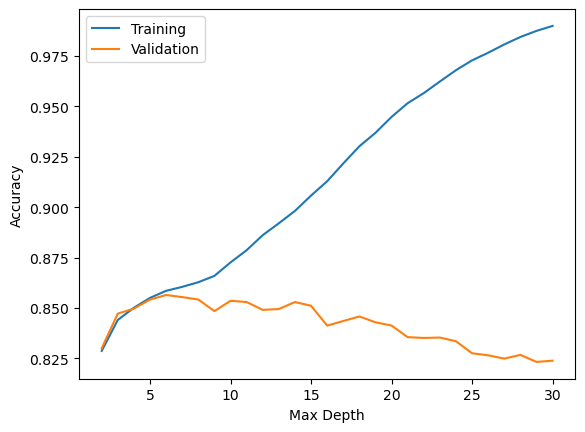

In [20]:
plt.plot(list(depth_range), dt_train_acc, label='Training')
plt.plot(list(depth_range), dt_valid_acc, label='Validation')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

### Random Forest Models

In [21]:
rf_train_acc = []
rf_valid_acc = []

for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X2_train, y2_train)
    rf_train_acc.append(temp_forest.score(X2_train, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid, y2_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = list(depth_range)[rf_idx]

print(f'''
Optimal value for max_depth:           {rf_opt_depth}
Training Accuracy for Optimal Model:   {np.round(rf_train_acc[rf_idx], 4)}
Validation Accuracy for Optimal Model: {np.round(rf_valid_acc[rf_idx], 4)}
''')


Optimal value for max_depth:           19
Training Accuracy for Optimal Model:   0.9192
Validation Accuracy for Optimal Model: 0.8643



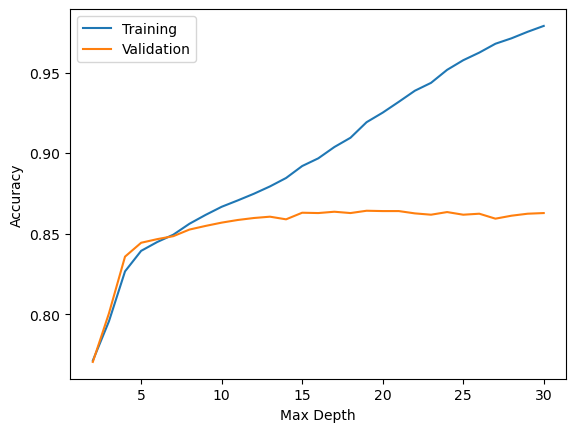

In [22]:
plt.plot(list(depth_range), rf_train_acc, label='Training')
plt.plot(list(depth_range), rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

### Evaluate Final Model

In [23]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=19, n_estimators=100)
final_model.fit(X2_train, y2_train)

print(f'''
Training Accuracy for Final Model:   {np.round(final_model.score(X2_train, y2_train), 4)}
Validation Accuracy for Final Model: {np.round(final_model.score(X2_valid, y2_valid), 4)}
Testing Accuracy for Final Model:    {np.round(final_model.score(X2_test, y2_test), 4)}
''')


Training Accuracy for Final Model:   0.9192
Validation Accuracy for Final Model: 0.8643
Testing Accuracy for Final Model:    0.8624



In [24]:
test_pred = final_model.predict(X2_test)
matrix = confusion_matrix(y2_test, test_pred)
df_matrix = pd.DataFrame(matrix, index=['<=50K', '>50K'], columns=['<=50K', '>50K'])
df_matrix

,<=50K,>50K
<=50K,3505,204
>50K,468,708


In [25]:
print(classification_report(y2_test, test_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3709
        >50K       0.78      0.60      0.68      1176

    accuracy                           0.86      4885
   macro avg       0.83      0.77      0.80      4885
weighted avg       0.86      0.86      0.86      4885

